# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import pprint

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html=browser.html
soup=BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows=soup.find_all('tr')    
print(rows)

[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_fact= []
# Loop through the scraped data to create a list of rows
mars_weather = soup.find_all('th')

for header in mars_weather:
    title = header.text
    mars_fact.append(title)
mars_fact

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(columns=mars_fact)
for row in soup.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        length=len(mars_df)
        mars_df.loc[length]=row_data


In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
datatypes = mars_df.dtypes
datatypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Confirm type changes were successful by examining data types again
# Convert Data Types
mars_df['id'] = mars_df['id'].astype(int)  
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])  # Convert to datetime
mars_df['sol'] = mars_df['sol'].astype('int32')
mars_df['ls'] = mars_df['ls'].astype('int32')
mars_df['month'] = mars_df['month'].astype('int32')
mars_df['min_temp'] = mars_df['min_temp'].astype('float64')
mars_df['pressure'] = mars_df  ['pressure'].astype('float64')

# Display Data Types
print(mars_df.dtypes)


id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [11]:
# 1. How many months are there on Mars?
months_count = mars_df['month'].nunique()
months_count

12

In [12]:
# 2. How many sols (Martian days) worth of data are there?
unique_sols = mars_df['sol'].nunique()
unique_sols

1867

In [13]:
# 3. What is the average minimum temperature by month?
average_min_temp = mars_df['min_temp'].groupby(mars_df['month']).mean()
average_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

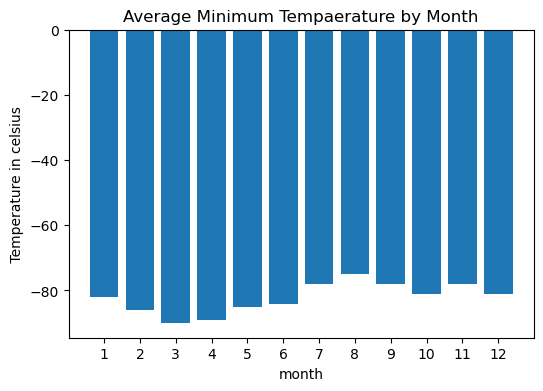

In [14]:
#  Plot the average minimum temperature by month
plt.figure(figsize=(6,4))
plt.bar(mars_df['month'],mars_df['min_temp'])
tic = range(1,13)
plt.xticks(tic)
plt.title('Average Minimum Tempaerature by Month')
plt.xlabel('month')
plt.ylabel(' Temperature in celsius ')
plt.show()


In [15]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_average_min_temp = average_min_temp.sort_values()
sorted_average_min_temp


month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

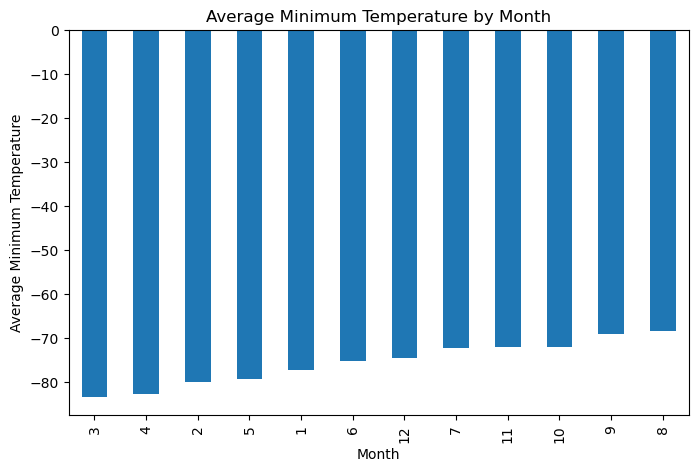

In [16]:
sorted_average_min_temp.plot(kind='bar', figsize=(8,5))
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.show()


In [17]:
# 4. What is the average pressure by month?
average_pressure = mars_df['pressure'].groupby(mars_df['month']).mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

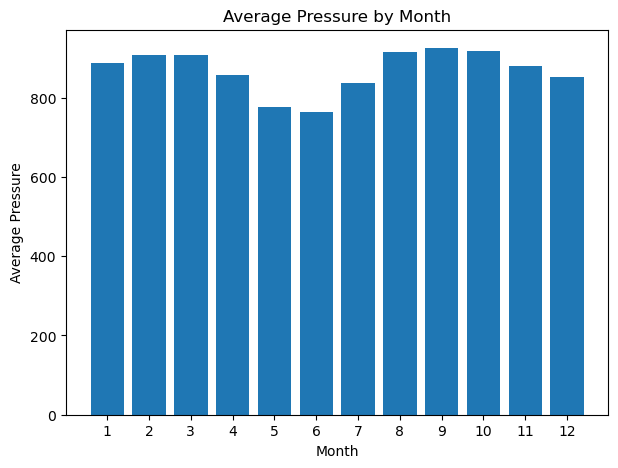

In [18]:
# Plot the average pressure by month
plt.figure(figsize=(7,5))
plt.bar(mars_df['month'],mars_df['pressure'])
tic = range(1,13)
plt.xticks(tic)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.show()


In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_average_pressure = average_pressure.sort_values()
sorted_average_pressure


month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

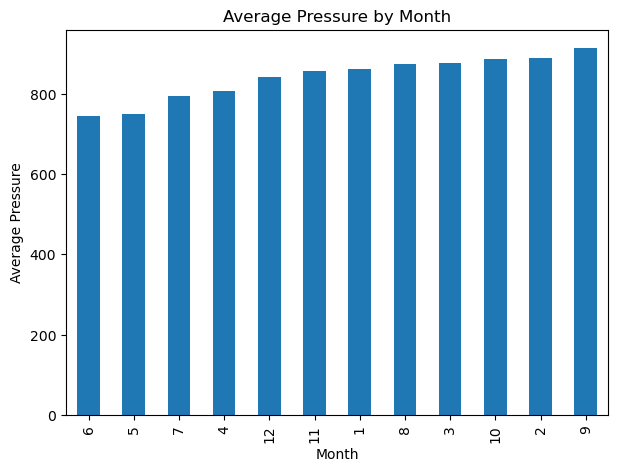

In [20]:
sorted_average_pressure.plot(kind='bar', figsize=(7,5))
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.show()

In [21]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
terrestrial_days = mars_df['terrestrial_date'].nunique()
terrestrial_days
# # Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# plt.figure(figsize=(8,5))
# plt.plot(mars_df['terrestrial_date'],mars_df['min_temp'])
# plt.title('Daily Minimum Temperature')
# plt.xlabel('Date')
# plt.ylabel('Minimum Temperature')
# plt.show()

1867

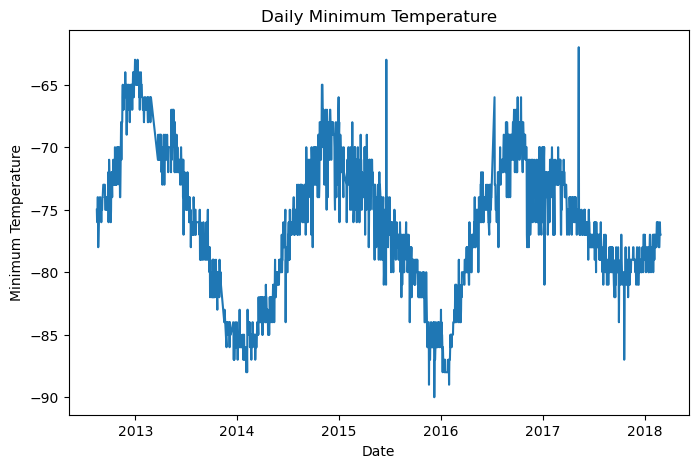

In [22]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(8,5))
plt.plot(mars_df['terrestrial_date'],mars_df['min_temp'])
plt.title('Daily Minimum Temperature')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

On average, third month has the coldest minimum temperature on Mars and eight month is the warmest temperature.

#### Atmospheric Pressure

YOUR ANALYSIS HERE

Atmospheric pressure is highest in ninth month and atmospheric pressure lowest in sixth month

#### Year Length

YOUR ANALYSIS HERE

The distance from peak to peak is roughly less than 2 years. A year on Mars appear to be about 670 days from the plot.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False)


In [24]:
# Close the browser
browser.quit()